###  <font color='green' size=5> HW #1: Analysis of the American Time Use Survey Dataset
</font> 

**Customer Analytics** <br>
**ANLT 274** <br>
**November 10, 2018** <br>
<br>

<font color='green' size=4> By: Ali Taheri</font>

At this project, we will analyze the dataset of times that Americans spent every day on different tasks between 2003 and 2012. All times are in minutes per day. Our stakeholder is a company that likes to know times that different groups of Americans spend on Shopping, Television, and Sleeping. They want to decide about advertising on various media's, and this information could help them for customer targeting.

In [307]:
# Import necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import warnings
import timeit

import scipy.stats as stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols

from IPython.display import display
pd.options.display.max_columns = None

import matplotlib

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 6)

In [308]:
df = pd.read_csv('WA_American-Time-Use-Survey.csv')

print(df.shape)

df.head(5)

(130150, 23)


,Education Level,Age,Age Range,Employment Status,Gender,Children,Weekly Earnings,Year,Weekly Hours Worked,Sleeping,Grooming,Housework,Food & Drink Prep,Caring for Children,Playing with Children,Job Searching,Shopping,Eating and Drinking,Socializing & Relaxing,Television,Golfing,Running,Volunteering
0,Master,60,60-69,Employed,Male,0,660,2003,30,870,40,0,0,0,0,0,0,5,325,325,0,200,0
1,Some College,41,40-49,Employed,Female,2,200,2003,30,620,60,0,0,60,0,0,0,90,590,60,0,0,0
2,Associate Degree,26,20-29,Employed,Female,0,200,2003,12,560,80,15,240,0,0,0,60,75,340,120,0,0,0
3,High School,36,30-39,Unemployed,Female,2,0,2003,0,720,35,0,150,5,0,120,0,25,265,265,0,0,0
4,Prof. Degree,51,50-59,Employed,Male,2,0,2003,80,385,75,0,0,120,0,0,0,92,60,60,0,0,0


At first, we loaded dataset in a pandas dataframe. This dataset has 130150 obsevation that each of them represents an American person. It has 23 attributes for each person that have mentioned above. Demographic informations are education level ,age , age_range ,employment ,gender ,number of children , daily earnings and year of information. All of these information could be considered as predictors. Other attributes are daily times for differnet activities. We change type of some attrebutes to categorical for further analysis. Next, we would have a statistical view.

In [309]:
df['Education Level']=df['Education Level'].astype('category')
#df['Age Range']=df['Age Range'].astype('category')
df['Employment Status']=df['Employment Status'].astype('category')
df['Gender']=df['Gender'].astype('category')

In [310]:
df.describe()

,Age,Children,Weekly Earnings,Year,Weekly Hours Worked,Sleeping,Grooming,Housework,Food & Drink Prep,Caring for Children,Playing with Children,Job Searching,Shopping,Eating and Drinking,Socializing & Relaxing,Television,Golfing,Running,Volunteering
count,130150.000000,130150.000000,130150.000000,130150.000000,130150.000000,130150.000000,130150.000000,130150.000000,130150.000000,130150.000000,130150.000000,130150.000000,130150.000000,130150.000000,130150.000000,130150.000000,130150.000000,130150.000000,130150.000000
mean,46.197111,0.883673,474.533792,2007.208513,24.604072,520.842835,40.329743,41.458602,34.672063,29.349036,7.849159,1.534983,26.550426,68.254791,288.100953,165.035851,1.292539,0.657311,9.949397
std,17.322031,1.142138,628.335842,2.976755,22.315194,134.845207,36.473379,82.204160,54.347920,74.663419,36.879381,19.398889,53.079121,52.212894,205.954898,168.805499,18.596591,7.460361,49.923729
min,15.000000,0.000000,0.000000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,0.000000,2004.000000,0.000000,440.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,127.000000,30.000000,0.000000,0.000000,0.000000
50%,45.000000,0.000000,234.000000,2007.000000,30.000000,510.000000,30.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,60.000000,250.000000,120.000000,0.000000,0.000000,0.000000
75%,59.000000,2.000000,760.000000,2010.000000,40.000000,600.000000,60.000000,57.000000,50.000000,10.000000,0.000000,0.000000,30.000000,90.000000,414.000000,240.000000,0.000000,0.000000,0.000000
max,85.000000,12.000000,2885.000000,2012.000000,160.000000,1436.000000,1043.000000,1405.000000,995.000000,1050.000000,840.000000,983.000000,879.000000,895.000000,1434.000000,1430.000000,659.000000,610.000000,1315.000000


It shows average age of people insample is about 46 years. These people are receiving 474 USD for 24 hours of work per week, so average wage is about 20 USD. In average, they are sleeping about 8/5 hours, watching TV about 3 hours and relax for 5 hours. For more convenient understanding, we assign all of 9th, 10th, 11th and 12th graders to group of High School.

In [312]:
df['Education Level'] = df['Education Level'].replace({'9th grade': 'High School' , '10th grade': 'High School' , \
                                                    '11th grade': 'High School' , '12th grade': 'High School'})

In [313]:
df.groupby(df['Education Level'])['Television'].mean()['Associate Degree']

155.1978148361127

# Exploratory Analysis

It is tome to have a deep exploratory analysis of dataset. Firstly, we like to see distribution of people on education.

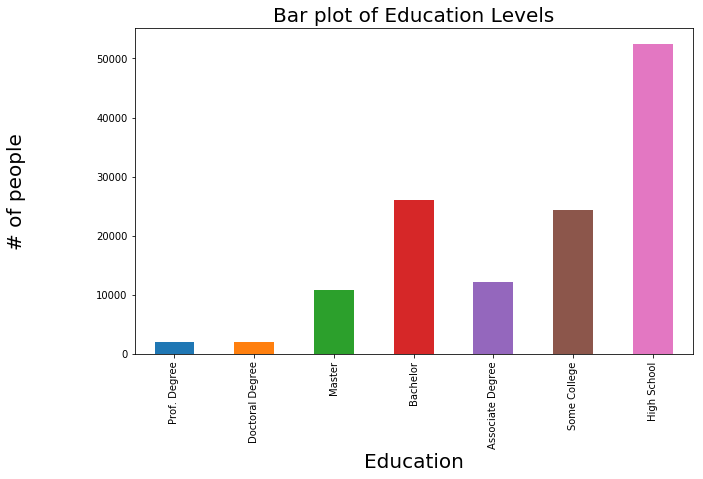

In [314]:
df['Education Level'].value_counts().reindex(['Prof. Degree','Doctoral Degree','Master','Bachelor','Associate Degree', \
                                              'Some College','High School']).plot(kind='bar')
plt.title("Bar plot of Education Levels", fontsize = 20)
plt.xlabel("Education", fontsize = 20)
plt.ylabel("# of people", fontsize = 20, labelpad = 70)
plt.show()

It shows highest education degree of majority of sample is high school, associate or bachelor.

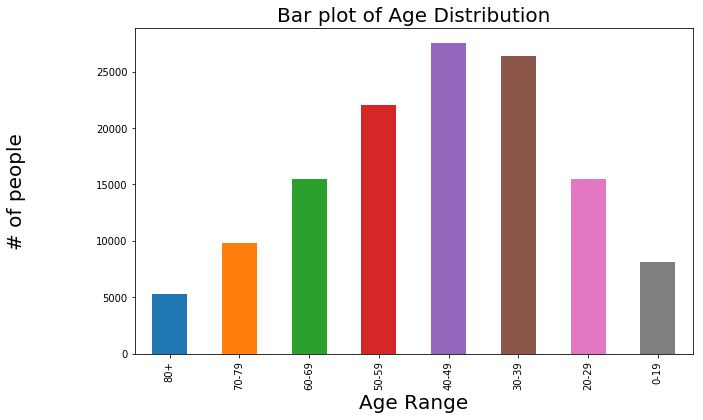

In [315]:
df['Age Range'].value_counts().reindex(['80+','70-79','60-69','50-59','40-49','30-39','20-29', '0-19']).plot(kind='bar')
plt.title("Bar plot of Age Distribution", fontsize = 20)
plt.xlabel("Age Range", fontsize = 20)
plt.ylabel("# of people", fontsize = 20, labelpad = 70)
plt.show()

Above plot shows distribution of age ranges. It seems that has a normal distribution. Due to lack of kids at this census, our graph is not complete.

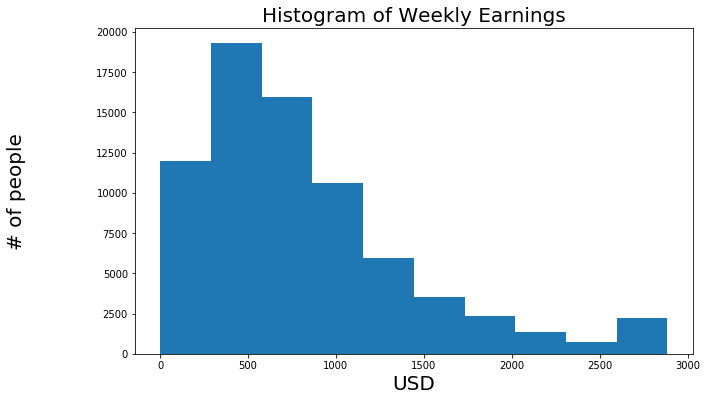

In [330]:
df.loc[df['Weekly Earnings'] !=0,'Weekly Earnings'].plot(kind='hist')
plt.title("Histogram of Weekly Earnings", fontsize = 20)
plt.xlabel("USD", fontsize = 20)
plt.ylabel("# of people", fontsize = 20, labelpad = 70)
plt.show()

It approves majority of american people are receiving lover than 750 USD per week that is below poverty line. Additionally it shows yearly income of 120K (200 USD per week) is very rare.

# Does higher education lead to higher earnings? 

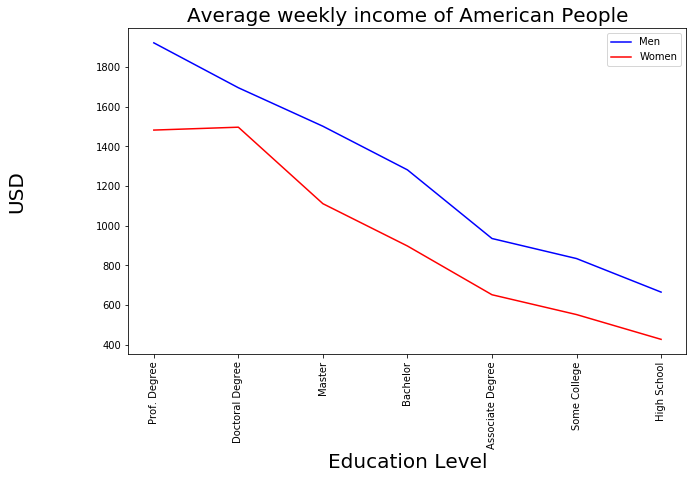

In [331]:
average_income_men=df[(df['Weekly Earnings'] != 0) & (df['Gender'] == 'Male')].groupby(df['Education Level'])['Weekly Earnings'].mean()
average_income_men=average_income_men.reindex(['Prof. Degree','Doctoral Degree','Master','Bachelor','Associate Degree', \
                                              'Some College','High School'])

average_income_women=df[(df['Weekly Earnings'] != 0) & (df['Gender'] == 'Female')].groupby(df['Education Level'])['Weekly Earnings'].mean()
average_income_women=average_income_women.reindex(['Prof. Degree','Doctoral Degree','Master','Bachelor','Associate Degree', \
                                              'Some College','High School'])


average_income_men.plot(color='blue' , label = 'Men')
average_income_women.plot(color='red' , label = 'Women')
plt.legend(loc='upper right')
plt.xticks(np.arange(len(average_income_men.index)),average_income_men.index, rotation='vertical')
plt.title("Average weekly income of American People", fontsize = 20)
plt.xlabel("Education Level", fontsize = 20)
plt.ylabel("USD", fontsize = 20, labelpad = 70)
plt.show()

This graph shows income of american people is increasing by their education. It means a professor could receive 4 times of a person with high school diploma. Additionally, income of men is higher than income of women in average.

# Does higher age lead to higher earnings?

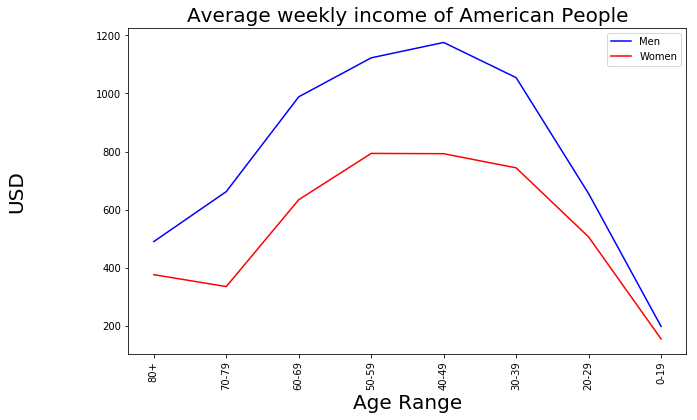

In [332]:
average_income_men=df[(df['Weekly Earnings'] != 0) & (df['Gender'] == 'Male')].groupby(df['Age Range'])['Weekly Earnings'].mean()
average_income_men=average_income_men.reindex(['80+','70-79','60-69','50-59','40-49','30-39','20-29', '0-19'])

average_income_women=df[(df['Weekly Earnings'] != 0) & (df['Gender'] == 'Female')].groupby(df['Age Range'])['Weekly Earnings'].mean()
average_income_women=average_income_women.reindex(['80+','70-79','60-69','50-59','40-49','30-39','20-29', '0-19'])

average_income_men.plot(color='blue' , label = 'Men')
average_income_women.plot(color='red' , label = 'Women')
plt.legend(loc='upper right')
plt.xticks(np.arange(len(average_income_men.index)),average_income_men.index, rotation='vertical')
plt.title("Average weekly income of American People", fontsize = 20)
plt.xlabel("Age Range", fontsize = 20)
plt.ylabel("USD", fontsize = 20, labelpad = 70)
plt.show()

Above graph shows income of people between 30 and 50 is maximum and after 50 it would decrease. Again, income of women is lower than income of men in average.

# Weekly Hours Worked by Education Level

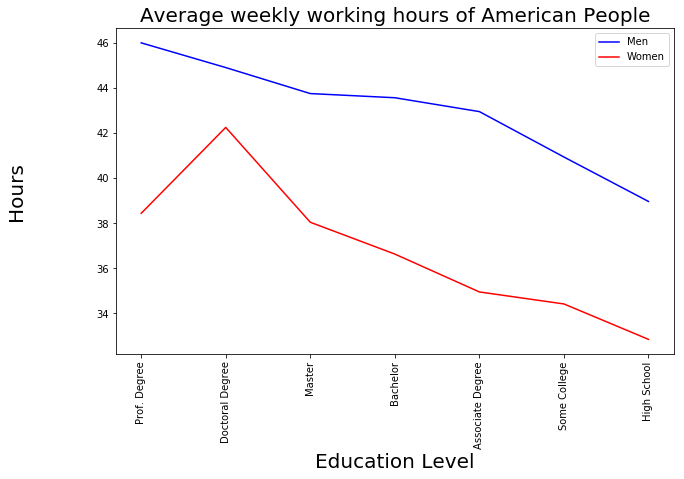

In [333]:
average_work_week_men=df[(df['Employment Status'] == 'Employed') & (df['Gender'] == 'Male')].groupby(df['Education Level'])['Weekly Hours Worked'].mean()
average_work_week_men=average_work_week_men.reindex(['Prof. Degree','Doctoral Degree','Master','Bachelor','Associate Degree', \
                                              'Some College','High School'])

average_work_week_women=df[(df['Employment Status'] == 'Employed') & (df['Gender'] == 'Female')].groupby(df['Education Level'])['Weekly Hours Worked'].mean()
average_work_week_women=average_work_week_women.reindex(['Prof. Degree','Doctoral Degree','Master','Bachelor','Associate Degree', \
                                              'Some College','High School'])
average_work_week_men.plot(color='blue' , label = 'Men')
average_work_week_women.plot(color='red' , label = 'Women')
plt.legend(loc='upper right')

plt.xticks(np.arange(len(average_work_week_men.index)),average_work_week_men.index, rotation='vertical')
plt.title("Average weekly working hours of American People", fontsize = 20)
plt.xlabel("Education Level", fontsize = 20)
plt.ylabel("Hours", fontsize = 20, labelpad = 70)
plt.show()

This graph shows people with higher education work more than other peoplw. Second insight is that men are working more than women. Final interesting insight is a big fall in weekly working timme of women professors. Let's to see these means.

In [320]:
rp.summary_cont(df.loc[(df['Employment Status'] == 'Employed') & (df['Gender'] == 'Female') , 'Weekly Hours Worked'].groupby(df['Education Level']))

,N,Mean,SD,SE,95% Conf.,Interval
Education Level,,,,,,
Associate Degree,5054,34.954294,13.863092,0.195004,34.572049,35.336538
Bachelor,10225,36.635892,14.886915,0.147222,36.347323,36.924462
Doctoral Degree,602,42.259136,16.090818,0.655813,40.972674,43.545598
High School,13504,32.849452,14.928562,0.128466,32.597650,33.101254
Master,4598,38.048499,15.131159,0.223145,37.611087,38.485912
Prof. Degree,673,38.444279,17.045464,0.657054,37.155495,39.733064
Some College,8601,34.421230,14.542427,0.156806,34.113873,34.728588


# Average Sleeping time by Education Level

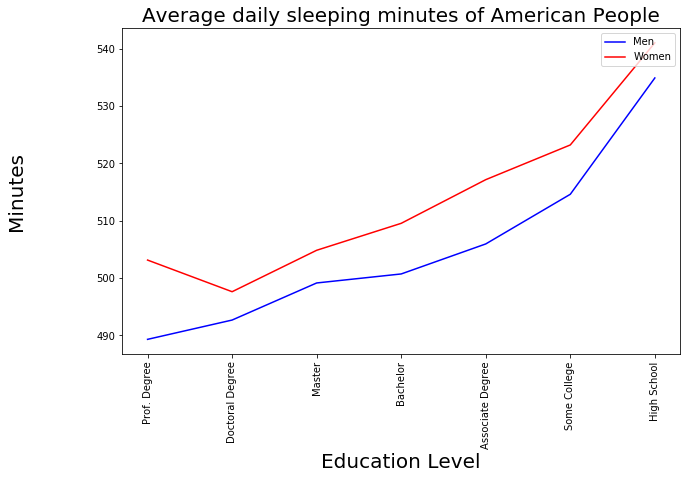

In [334]:
average_sleep_men=df[(df['Gender'] == 'Male') & (df['Sleeping'] != 0)].groupby(df['Education Level'])['Sleeping'].mean()
average_sleep_men=average_sleep_men.reindex(['Prof. Degree','Doctoral Degree','Master','Bachelor','Associate Degree', \
                                              'Some College','High School'])

average_sleep_women=df[(df['Gender'] == 'Female') & (df['Sleeping'] != 0)].groupby(df['Education Level'])['Sleeping'].mean()
average_sleep_women=average_sleep_women.reindex(['Prof. Degree','Doctoral Degree','Master','Bachelor','Associate Degree', \
                                              'Some College','High School'])
average_sleep_men.plot(color='blue' , label = 'Men')
average_sleep_women.plot(color='red' , label = 'Women')
plt.legend(loc='upper right')

plt.xticks(np.arange(len(average_sleep_men.index)),average_sleep_men.index, rotation='vertical')
plt.title("Average daily sleeping minutes of American People", fontsize = 20)
plt.xlabel("Education Level", fontsize = 20)
plt.ylabel("Minutes", fontsize = 20, labelpad = 70)
plt.show()

It is interesting people with lower education sleep more and women sleep more than men.

# Relation between caring for children and education

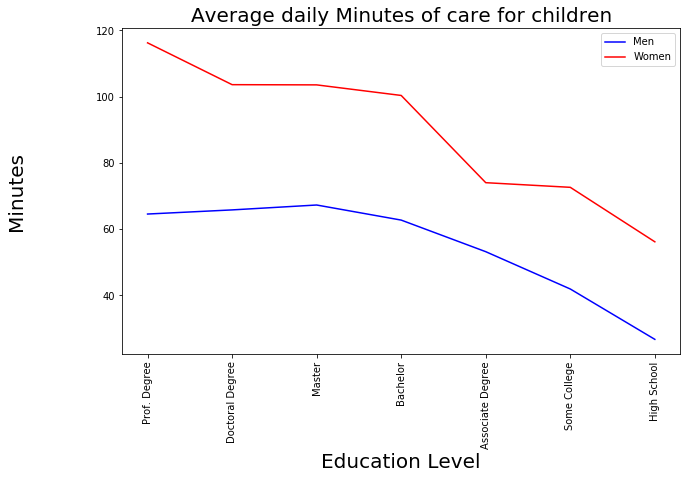

In [335]:
average_childcare_men=df[(df['Children'] != 0) & (df['Gender'] == 'Male')].groupby(df['Education Level'])['Caring for Children'].mean()
average_childcare_men=average_childcare_men.reindex(['Prof. Degree','Doctoral Degree','Master','Bachelor','Associate Degree', \
                                              'Some College','High School'])

average_childcare_women=df[(df['Children'] != 0) & (df['Gender'] == 'Female')].groupby(df['Education Level'])['Caring for Children'].mean()
average_childcare_women=average_childcare_women.reindex(['Prof. Degree','Doctoral Degree','Master','Bachelor','Associate Degree', \
                                              'Some College','High School'])

average_childcare_men.plot(color='blue' , label = 'Men')
average_childcare_women.plot(color='red' , label = 'Women')
plt.legend(loc='upper right')

plt.xticks(np.arange(len(average_childcare_men.index)),average_childcare_men.index, rotation='vertical')
plt.title("Average daily Minutes of care for children", fontsize = 20)
plt.xlabel("Education Level", fontsize = 20)
plt.ylabel("Minutes", fontsize = 20, labelpad = 70)
plt.show()

Above graph approve people with higher education are assiging more time to their children and women have higher attention to their kids.

# Relation between TV time  and age

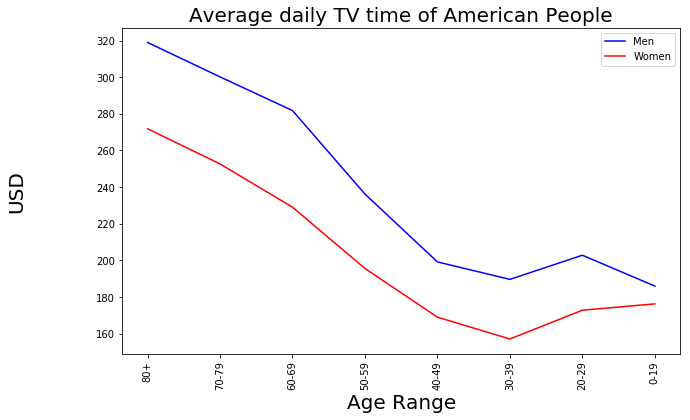

In [337]:
average_tv_men=df[(df['Television'] != 0) & (df['Gender'] == 'Male')].groupby(df['Age Range'])['Television'].mean()
average_tv_men=average_tv_men.reindex(['80+','70-79','60-69','50-59','40-49','30-39','20-29', '0-19'])

average_tv_women=df[(df['Television'] != 0) & (df['Gender'] == 'Female')].groupby(df['Age Range'])['Television'].mean()
average_tv_women=average_tv_women.reindex(['80+','70-79','60-69','50-59','40-49','30-39','20-29', '0-19'])

average_tv_men.plot(color='blue' , label = 'Men')
average_tv_women.plot(color='red' , label = 'Women')
plt.legend(loc='upper right')
plt.xticks(np.arange(len(average_tv_men.index)),average_tv_men.index, rotation='vertical')
plt.title("Average daily TV time of American People", fontsize = 20)
plt.xlabel("Age Range", fontsize = 20)
plt.ylabel("USD", fontsize = 20, labelpad = 70)
plt.show()

# Relation between TV time  and education

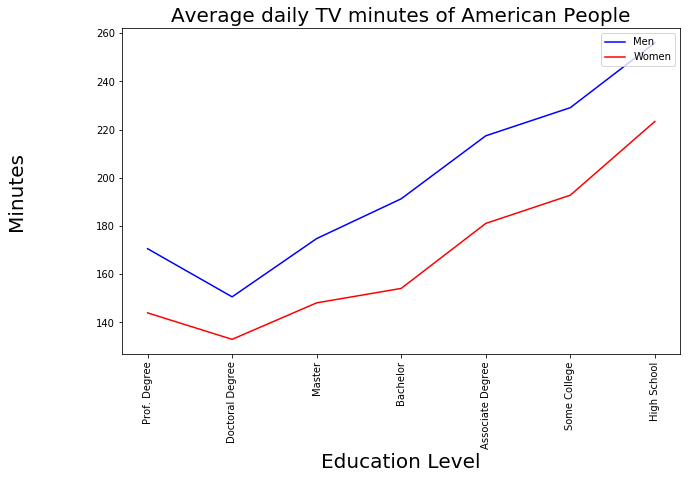

In [338]:
average_tv_men=df[(df['Television'] != 0) & (df['Gender'] == 'Male')].groupby(df['Education Level'])['Television'].mean()
average_tv_men=average_tv_men.reindex(['Prof. Degree','Doctoral Degree','Master','Bachelor','Associate Degree', \
                                              'Some College','High School'])

average_tv_women=df[(df['Television'] != 0) & (df['Gender'] == 'Female')].groupby(df['Education Level'])['Television'].mean()
average_tv_women=average_tv_women.reindex(['Prof. Degree','Doctoral Degree','Master','Bachelor','Associate Degree', \
                                              'Some College','High School'])
average_tv_men.plot(color='blue' , label = 'Men')
average_tv_women.plot(color='red' , label = 'Women')
plt.legend(loc='upper right')

plt.xticks(np.arange(len(average_tv_men.index)),average_tv_men.index, rotation='vertical')
plt.title("Average daily TV minutes of American People", fontsize = 20)
plt.xlabel("Education Level", fontsize = 20)
plt.ylabel("Minutes", fontsize = 20, labelpad = 70)
plt.show()

# Relation between golfing  and education

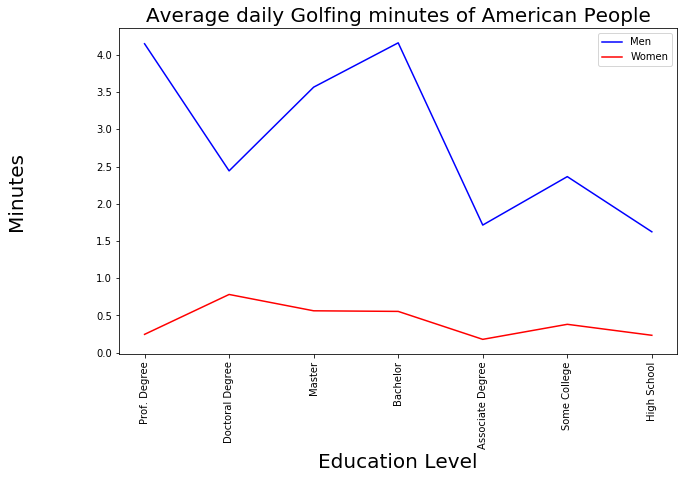

In [326]:
average_golf_men=df[df['Gender'] == 'Male'].groupby(df['Education Level'])['Golfing'].mean()
average_golf_men=average_golf_men.reindex(['Prof. Degree','Doctoral Degree','Master','Bachelor','Associate Degree', \
                                              'Some College','High School'])

average_golf_women=df[df['Gender'] == 'Female'].groupby(df['Education Level'])['Golfing'].mean()
average_golf_women=average_golf_women.reindex(['Prof. Degree','Doctoral Degree','Master','Bachelor','Associate Degree', \
                                              'Some College','High School'])
average_golf_men.plot(color='blue' , label = 'Men')
average_golf_women.plot(color='red' , label = 'Women')
plt.legend(loc='upper right')

plt.xticks(np.arange(len(average_golf_men.index)),average_golf_men.index, rotation='vertical')
plt.title("Average daily Golfing minutes of American People", fontsize = 20)
plt.xlabel("Education Level", fontsize = 20)
plt.ylabel("Minutes", fontsize = 20, labelpad = 70)
plt.show()

# Relation between running  and education

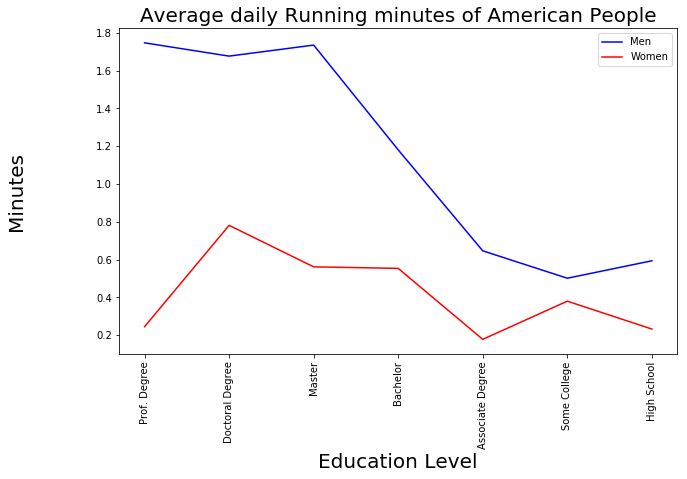

In [327]:
average_run_men=df[df['Gender'] == 'Male'].groupby(df['Education Level'])['Running'].mean()
average_run_men=average_run_men.reindex(['Prof. Degree','Doctoral Degree','Master','Bachelor','Associate Degree', \
                                              'Some College','High School'])

average_run_women=df[df['Gender'] == 'Female'].groupby(df['Education Level'])['Running'].mean()
average_run_women=average_golf_women.reindex(['Prof. Degree','Doctoral Degree','Master','Bachelor','Associate Degree', \
                                              'Some College','High School'])
average_run_men.plot(color='blue' , label = 'Men')
average_run_women.plot(color='red' , label = 'Women')
plt.legend(loc='upper right')

plt.xticks(np.arange(len(average_run_men.index)),average_run_men.index, rotation='vertical')
plt.title("Average daily Running minutes of American People", fontsize = 20)
plt.xlabel("Education Level", fontsize = 20)
plt.ylabel("Minutes", fontsize = 20, labelpad = 70)
plt.show()

# All about Shopping time 

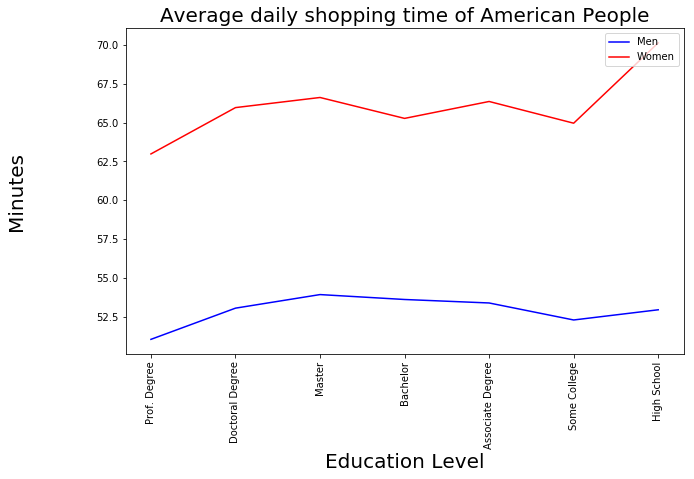

In [339]:
average_shop_men=df[(df['Shopping'] != 0) & (df['Gender'] == 'Male')].groupby(df['Education Level'])['Shopping'].mean()
average_shop_men=average_shop_men.reindex(['Prof. Degree','Doctoral Degree','Master','Bachelor','Associate Degree', \
                                              'Some College','High School'])

average_shop_women=df[(df['Shopping'] != 0) & (df['Gender'] == 'Female')].groupby(df['Education Level'])['Shopping'].mean()
average_shop_women=average_shop_women.reindex(['Prof. Degree','Doctoral Degree','Master','Bachelor','Associate Degree', \
                                              'Some College','High School'])


average_shop_men.plot(color='blue' , label = 'Men')
average_shop_women.plot(color='red' , label = 'Women')
plt.legend(loc='upper right')

plt.xticks(np.arange(len(average_shop_men.index)),average_shop_men.index, rotation='vertical')
plt.title("Average daily shopping time of American People", fontsize = 20)
plt.xlabel("Education Level", fontsize = 20)
plt.ylabel("Minutes", fontsize = 20, labelpad = 70)
plt.show()

Above graph shows that women go shopping more than men and education does not have considerable influence on shopping time.

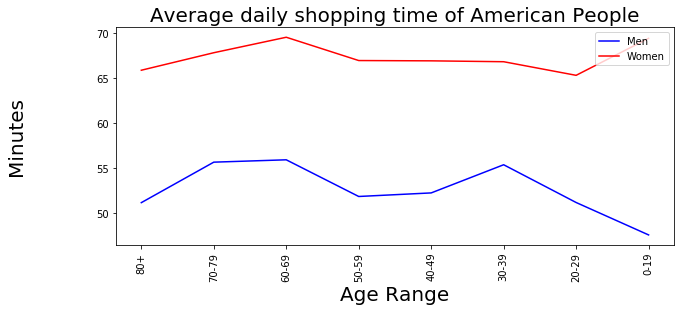

In [341]:
fig, ax = matplotlib.pyplot.subplots(figsize=(10,4))
average_shop_men=df[(df['Shopping'] != 0) & (df['Gender'] == 'Male')].groupby(df['Age Range'])['Shopping'].mean()
average_shop_men=average_shop_men.reindex(['80+','70-79','60-69','50-59','40-49','30-39','20-29', '0-19'])

average_shop_women=df[(df['Shopping'] != 0) & (df['Gender'] == 'Female')].groupby(df['Age Range'])['Shopping'].mean()
average_shop_women=average_shop_women.reindex(['80+','70-79','60-69','50-59','40-49','30-39','20-29', '0-19'])


average_shop_men.plot(color='blue' , label = 'Men')
average_shop_women.plot(color='red' , label = 'Women')
plt.legend(loc='upper right')
plt.xticks(np.arange(len(average_shop_men)),average_shop_men.index, rotation='vertical')
plt.title("Average daily shopping time of American People", fontsize = 20)
plt.xlabel("Age Range", fontsize = 20)
plt.ylabel("Minutes", fontsize = 20, labelpad = 70)
plt.show()

Above graph shows again women are powerful shoppers. 

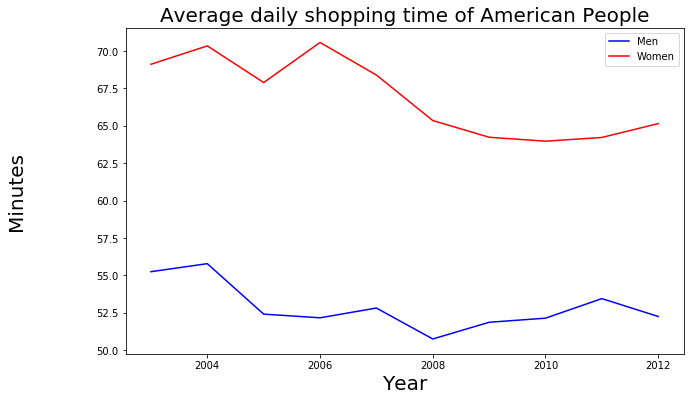

In [342]:
average_shop_men=df[(df['Shopping'] != 0) & (df['Gender'] == 'Male')].groupby(df['Year'])['Shopping'].mean()
#average_shop_week_men=average_shop_week_men.reindex(['80+','70-79','60-69','50-59','40-49','30-39','20-29', '0-19'])

average_shop_women=df[(df['Shopping'] != 0) & (df['Gender'] == 'Female')].groupby(df['Year'])['Shopping'].mean()
#average_shop_week_women=average_shop_week_women.reindex(['80+','70-79','60-69','50-59','40-49','30-39','20-29', '0-19'])


average_shop_men.plot(color='blue' , label = 'Men')
average_shop_women.plot(color='red' , label = 'Women')
plt.legend(loc='upper right')
plt.title("Average daily shopping time of American People", fontsize = 20)
plt.xlabel("Year", fontsize = 20)
plt.ylabel("Minutes", fontsize = 20, labelpad = 70)
plt.show()

It shows Americans spend less time after recession of 2008.

# Hypothesis Testing

#### Null Hypothesis: 
           Education does not have any effect on TV time and sleeping time of women. 
#### Alternate Hypithesis:
           Less educated women are more likely to watch TV and sleep than high educated women.

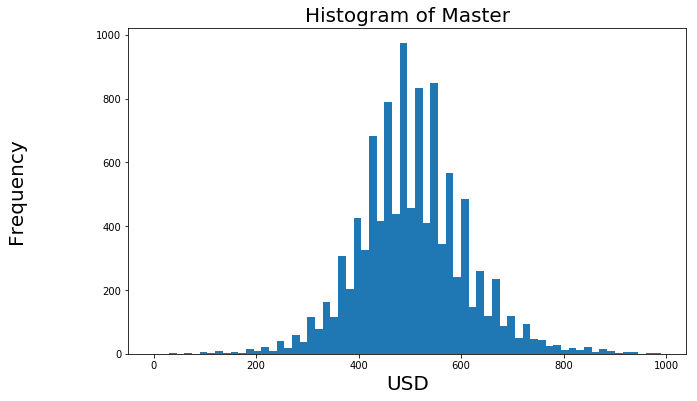

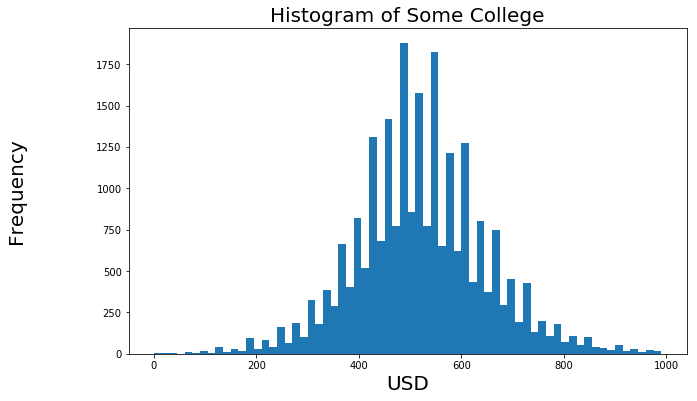

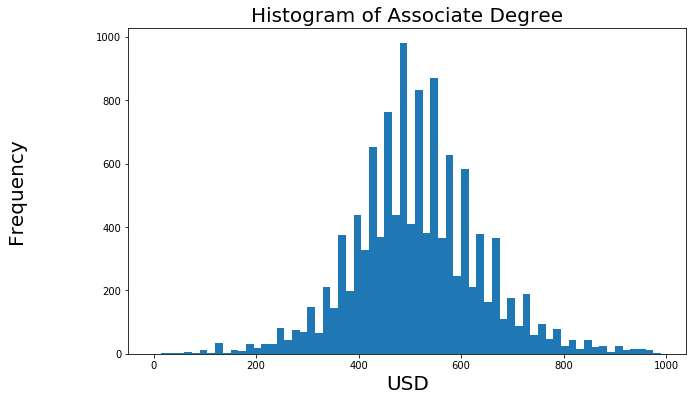

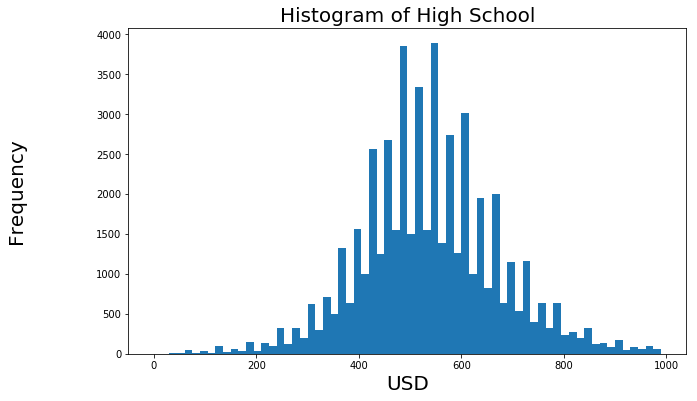

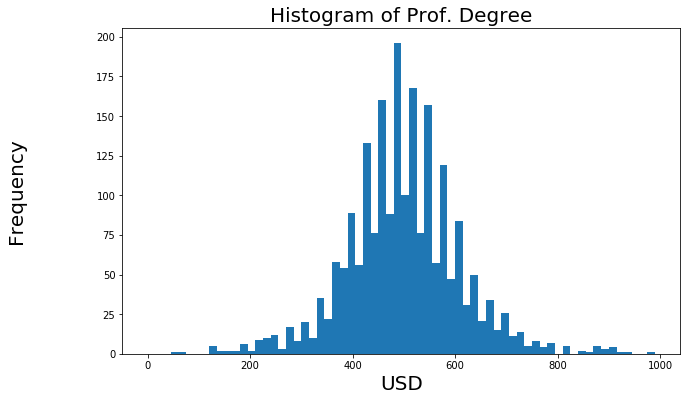

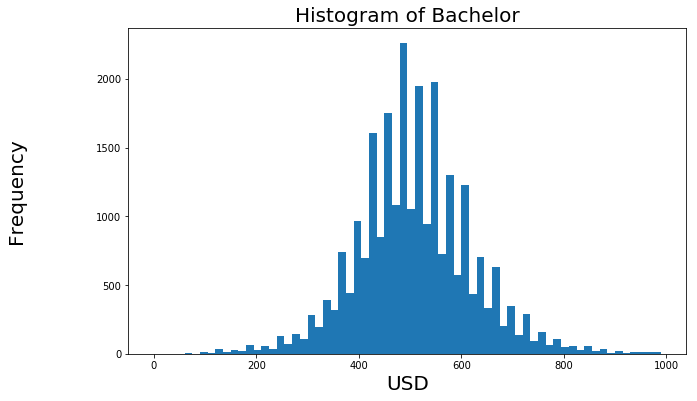

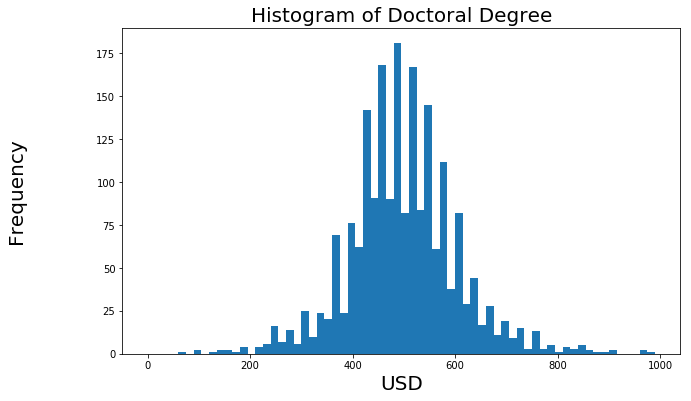

In [344]:
bins=list(range(0,1000,20))
col='Sleeping'

for edu_level in df['Education Level'].unique():
    df[col][(df[col] != 0) & (df['Education Level'] == edu_level)].plot(kind='hist',bins=list(range(0,1000,15)))
    plt.title("Histogram of "+edu_level, fontsize = 20)
    plt.xlabel("USD", fontsize = 20)
    plt.ylabel("Frequency", fontsize = 20, labelpad = 70)
    plt.show()

In [345]:
col= 'Television'
dfn=df[(df[col] !=0) & (df['Gender'] == 'Female')].copy()
#dfn=df[(df[col] !=0)].copy()
dfn.rename(columns={'Education Level':'Education_Level'}, inplace=True)
rp.summary_cont(dfn[col])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Television,57636.0,192.841193,152.367956,0.634668,191.59724,194.085146


In [346]:
rp.summary_cont(dfn[col].groupby(dfn['Education_Level']))

,N,Mean,SD,SE,95% Conf.,Interval
Education_Level,,,,,,
Associate Degree,5757,181.058537,142.840662,1.882581,177.368358,184.748717
Bachelor,10783,154.083650,123.887712,1.193049,151.745165,156.422135
Doctoral Degree,464,132.943966,97.848127,4.542485,124.031085,141.856846
High School,24311,223.379951,167.035529,1.071291,221.280178,225.479725
Master,4470,148.095749,117.740018,1.761045,144.643716,151.547783
Prof. Degree,574,143.933798,111.813634,4.667011,134.778478,153.089118
Some College,11277,192.770684,149.390178,1.406777,190.013279,195.528089


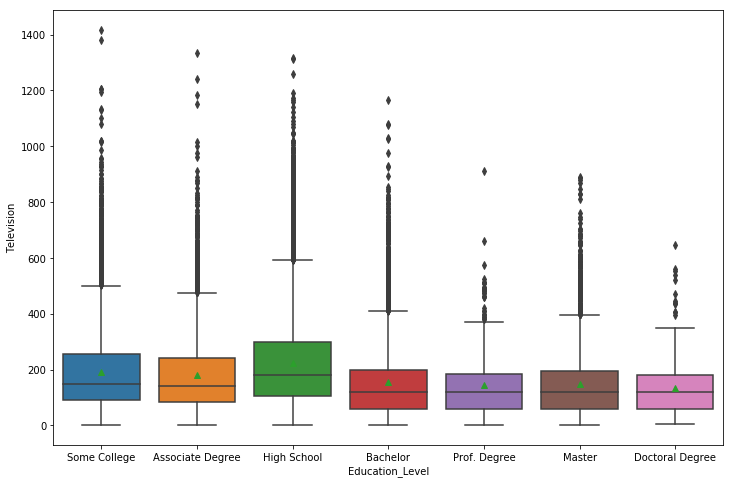

In [348]:
fig, ax = matplotlib.pyplot.subplots(figsize=(12,8))
sns.boxplot(x=dfn['Education_Level'], y=dfn[col], showmeans=True)
plt.show()

In [349]:
results = ols(col+' ~ C(Education_Level)', data=dfn).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Television   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     385.7
Date:                Mon, 03 Dec 2018   Prob (F-statistic):               0.00
Time:                        15:42:16   Log-Likelihood:            -3.7034e+05
No. Observations:               57636   AIC:                         7.407e+05
Df Residuals:                   57629   BIC:                         7.408e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                               181.0585      1.969     91.950      0.000     177.199     184.918
C(Education_Level)[T.Bachelor]          -26.9749      2.439    -11.061      0.000     -31.755     -22.195
C(Education_Level)[T.Doctoral Degree]   -48.1146      7.210     -6.673      0.000     -62.246     -33.983
C(Education_Level)[T.High School]        42.3214      2.190     19.326      0.000      38.029      46.614
C(Education_Level)[T.Master]            -32.9628      2.978    -11.067      0.000     -38.801     -27.125
C(Education_Level)[T.Prof. Degree]      -37.1247      6.540     -5.677      0.000     -49.942     -24.307
C(Education_Level)[T.Some College]       11.7121      2.420      4.840      0.000       6.969      16.456
==============================================================================
Omnibus:                    17678.727   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55215.074
Skew:                           1.586   Prob(JB):                         0.00
Kurtosis:                       6.595   Cond. No.                         13.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [350]:
col= 'Sleeping'
#dfn=df[(df[col] !=0) & (df['Gender'] == 'Female')].copy()
dfn=df[(df[col] !=0)].copy()
dfn.rename(columns={'Education Level':'Education_Level'}, inplace=True)
rp.summary_cont(dfn[col])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Sleeping,129983.0,521.512005,133.632363,0.370654,520.785531,522.23848


In [351]:
rp.summary_cont(dfn[col].groupby(dfn['Education_Level']))

,N,Mean,SD,SE,95% Conf.,Interval
Education_Level,,,,,,
Associate Degree,12148,512.745226,132.382429,1.201097,510.390979,515.099472
Bachelor,25988,505.639872,117.908359,0.731405,504.206290,507.073454
Doctoral Degree,2040,494.478431,110.124262,2.438192,489.698403,499.258460
High School,52435,538.362487,143.513705,0.626733,537.134078,539.590896
Master,10852,502.453465,110.681710,1.062481,500.370907,504.536023
Prof. Degree,2136,494.852996,113.413223,2.453935,490.042157,499.663835
Some College,24384,519.639641,136.234535,0.872438,517.929627,521.349655


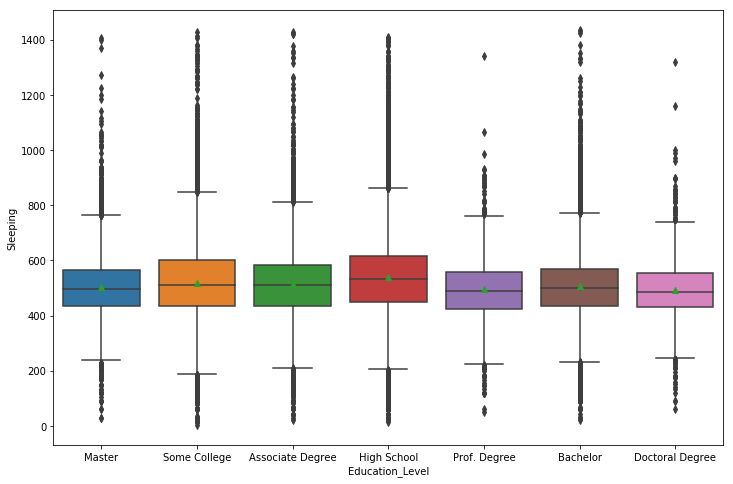

In [352]:
fig, ax = matplotlib.pyplot.subplots(figsize=(12,8))
sns.boxplot(x=dfn['Education_Level'], y=dfn[col], showmeans=True)
plt.show()

In [353]:
results = ols(col+' ~ C(Education_Level)', data=dfn).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Sleeping   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     277.9
Date:                Mon, 03 Dec 2018   Prob (F-statistic):               0.00
Time:                        15:42:42   Log-Likelihood:            -8.1989e+05
No. Observations:              129983   AIC:                         1.640e+06
Df Residuals:                  129976   BIC:                         1.640e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                               512.7452      1.205    425.599      0.000     510.384     515.107
C(Education_Level)[T.Bachelor]           -7.1054      1.459     -4.869      0.000      -9.966      -4.245
C(Education_Level)[T.Doctoral Degree]   -18.2668      3.177     -5.749      0.000     -24.494     -12.040
C(Education_Level)[T.High School]        25.6173      1.337     19.159      0.000      22.997      28.238
C(Education_Level)[T.Master]            -10.2918      1.754     -5.868      0.000     -13.729      -6.854
C(Education_Level)[T.Prof. Degree]      -17.8922      3.115     -5.743      0.000     -23.999     -11.786
C(Education_Level)[T.Some College]        6.8944      1.475      4.675      0.000       4.004       9.785
==============================================================================
Omnibus:                    13861.992   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42307.617
Skew:                           0.566   Prob(JB):                         0.00
Kurtosis:                       5.555   Cond. No.                         11.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Above testings prove that there are evidents that Education level has influence on TV time and Sleeping time of Americans, so they must be considered in customer targeting. For example, if we plan to target higher educated people for a new mobile application, it is better to go for social media instead of TV.

# Making model by Random forest

In [155]:
warnings.filterwarnings("ignore")
# Defining categorical variables encoder method
def fit_transform_ohe(df,col_name):
    """This function performs one hot encoding for the specified
column.
    Args:
        df(pandas.DataFrame): the data frame containing the mentioned column name
        col_name: the column to be one hot encoded
    Returns:
        tuple: label_encoder, one_hot_encoder, transformed column as pandas Series
    """
    # label encode the column
    le = preprocessing.LabelEncoder()
    le_labels = le.fit_transform(df[col_name])
    df[col_name+'_label'] = le_labels
    # one hot encoding
    ohe = preprocessing.OneHotEncoder()
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)
    return features_df

# given label encoder and one hot encoder objects, 
# encode attribute to ohe
def transform_ohe(df,le,ohe,col_name):
    """This function performs one hot encoding for the specified
        column using the specified encoder objects.

    Args:
        df(pandas.DataFrame): the data frame containing the mentioned column name
        le(Label Encoder): the label encoder object used to fit label encoding
        ohe(One Hot Encoder): the onen hot encoder object used to fit one hot encoding
        col_name: the column to be one hot encoded

    Returns:
        tuple: transformed column as pandas Series

    """
    # label encode
    col_labels = le.transform(df[col_name])
    df[col_name+'_label'] = col_labels
    
    # ohe 
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)
    
    return features_df

Above function is for on-hot encoding of categorical variables.Now, we apply to those attributes and join resulted columns to main dataframe.

In [355]:
df=df.join(fit_transform_ohe(df,'Education Level'))

df=df.join(fit_transform_ohe(df,'Employment Status'))

df=df.join(fit_transform_ohe(df,'Gender'))

In [357]:
features=df.drop(['Education Level' ,'Age Range', 'Employment Status' , 'Gender' , 'Education Level_label' ,\
               'Employment Status_label', 'Gender_label'] , axis=1)

attr='Sleeping'
features=features[features[attr] != 0]

#cols = list(features.loc[:,'Age':'Weekly Hours Worked']) + list(features.loc[:,'Education Level_Associate Degree':])
cols = list(features.loc[:,'Age':'Weekly Hours Worked']) + list(features.loc[:,'Education Level_Associate Degree':])
cols.remove('Year')
# Labels are the values we want to predict

We extracted a new dataframe features and will consider all demographic, education and employment information as predictors and Sleeping time as target variable.

In [358]:
#labels = np.array(features['Television'])
labels = np.array(features[attr])
# Remove the labels from the features
# axis 1 refers to the columns
#features= features.drop('Sleeping', axis = 1)
features = features[cols]
# Saving feature names for later use
feature_list = cols
#feature_list = list(features.columns)
# Convert to numpy array
#features = np.array(features[cols])
features = np.array(features[cols])

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = \
train_test_split(features, labels, test_size = 0.25, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (97487, 16)
Training Labels Shape: (97487,)
Testing Features Shape: (32496, 16)
Testing Labels Shape: (32496,)


In [364]:
#baseline_preds = test_features[:, feature_list.index('average')]
# Baseline errors, and display average baseline error
baseline_preds=np.repeat(test_labels.mean(), len(test_labels))
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  98.74


In [366]:


rf = RandomForestRegressor(n_estimators = 20, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'minutes.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 104.25 minutes.
Accuracy: 76.13 %.


Above results show that our model does not work well, so maybe machine learning could not help us to forecat sleeping time based on demographic information!